## Preliminary Analysis of the MP Dataset
<br><br>
- Load dataset into pandas
- Explore dataset, visualise time series to get a better understanding of the data
- Run the ROCKET classifier
<br><br>

In [15]:
import os
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

from random import randrange
import mpdatasets
import rocket
from sktime.datasets import load_from_tsfile_to_dataframe

<br><br>
### Load the MP datasets

- Data stored in sktime .ts file format
- Sets train_x and test_x contain data samples while train_y and test_y store the corresponding class labels

In [16]:
train_x, train_y = load_from_tsfile_to_dataframe(os.getcwd() + r"\OpenPose_MP\Full25BodyParts" + r"\TRAIN_full_X.ts")
test_x, test_y = load_from_tsfile_to_dataframe(os.getcwd() + r"\OpenPose_MP\Full25BodyParts" + r"\TEST_full_X.ts")

train_x.columns = ['Nose_X', 'Neck_X', 'RShoulder_X', 'RElbow_X', 'RWrist_X', 'LShoulder_X', 'LElbow_X', 'LWrist_X', 'MidHip_X', 'RHip_X', 'RKnee_X', 'RAnkle_X', 'LHip_X', 'LKnee_X', 'LAnkle_X', 'REye_X', 'LEye_X', 'REar_X', 'LEar_X', 'LBigToe_X', 'LSmallToe_X', 'LHeel_X', 'RBigToe_X', 'RSmallToe_X', 'RHeel_X', 'Nose_Y', 'Neck_Y', 'RShoulder_Y', 'RElbow_Y', 'RWrist_Y', 'LShoulder_Y', 'LElbow_Y', 'LWrist_Y', 'MidHip_Y', 'RHip_Y', 'RKnee_Y', 'RAnkle_Y', 'LHip_Y', 'LKnee_Y', 'LAnkle_Y', 'REye_Y', 'LEye_Y', 'REar_Y', 'LEar_Y', 'LBigToe_Y', 'LSmallToe_Y', 'LHeel_Y', 'RBigToe_Y', 'RSmallToe_Y', 'RHeel_Y',]
test_x.columns = ['Nose_X', 'Neck_X', 'RShoulder_X', 'RElbow_X', 'RWrist_X', 'LShoulder_X', 'LElbow_X', 'LWrist_X', 'MidHip_X', 'RHip_X', 'RKnee_X', 'RAnkle_X', 'LHip_X', 'LKnee_X', 'LAnkle_X', 'REye_X', 'LEye_X', 'REar_X', 'LEar_X', 'LBigToe_X', 'LSmallToe_X', 'LHeel_X', 'RBigToe_X', 'RSmallToe_X', 'RHeel_X', 'Nose_Y', 'Neck_Y', 'RShoulder_Y', 'RElbow_Y', 'RWrist_Y', 'LShoulder_Y', 'LElbow_Y', 'LWrist_Y', 'MidHip_Y', 'RHip_Y', 'RKnee_Y', 'RAnkle_Y', 'LHip_Y', 'LKnee_Y', 'LAnkle_Y', 'REye_Y', 'LEye_Y', 'REar_Y', 'LEar_Y', 'LBigToe_Y', 'LSmallToe_Y', 'LHeel_Y', 'RBigToe_Y', 'RSmallToe_Y', 'RHeel_Y',]

- train_x and test_x are both pandas DataFrames
- train_y and test_y are both NumPy arrays

In [17]:
print(type(train_x))
print(type(train_y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [18]:
train_x.head()

,Nose_X,Neck_X,RShoulder_X,RElbow_X,RWrist_X,LShoulder_X,LElbow_X,LWrist_X,MidHip_X,RHip_X,...,REye_Y,LEye_Y,REar_Y,LEar_Y,LBigToe_Y,LSmallToe_Y,LHeel_Y,RBigToe_Y,RSmallToe_Y,RHeel_Y
0,0 194.389000 1 169.552221 2 181...,0 191.832000 1 191.974310 2 191...,0 165.614000 1 172.119082 2 168...,0 144.265000 1 156.665067 2 149...,0 135.564000 1 148.657425 2 141...,0 214.418000 1 208.976935 2 212...,0 234.420000 1 222.020993 2 228...,0 243.090000 1 226.669439 2 232...,0 185.630000 1 185.629459 2 185...,0 168.074000 1 189.895134 2 201...,...,0 114.303000 1 99.912083 2 107...,0 114.313000 1 99.935371 2 107...,0 116.824000 1 117.087417 2 116...,0 118.048000 1 117.656973 2 117...,0 0.000000 1 370.794837 2 414...,0 0.000000 1 372.281451 2 416...,0 0.000000 1 378.945549 2 423...,0 0.000000 1 388.197062 2 423...,0 0.000000 1 392.261464 2 427...,0 0.000000 1 221.859336 2 339...
1,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 264.395000 1 264.398569 2 264...,0 284.380000 1 284.394307 2 284...,0 310.684000 1 311.964570 2 311...,0 305.636000 1 305.471222 2 305...,0 244.385000 1 244.384413 2 244...,0 224.351000 1 224.351797 2 224...,0 225.651000 1 225.603022 2 225...,0 265.643000 1 265.636189 2 265...,0 279.383000 1 278.782449 2 278...,...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 125.538000 1 125.546659 2 125...,0 125.539000 1 125.554137 2 125...,0 325.724000 1 325.722815 2 325...,0 326.914000 1 326.902999 2 326...,0 334.392000 1 334.388050 2 334...,0 330.694000 1 330.705994 2 330...,0 333.164000 1 333.165676 2 333...,0 335.633000 1 335.624777 2 335...
2,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 211.857000 1 211.816605 2 211...,0 230.612000 1 230.582558 2 230...,0 260.664000 1 261.235931 2 259...,0 248.121000 1 247.252632 2 249...,0 193.055000 1 193.063923 2 193...,0 165.615000 1 165.203721 2 166...,0 170.593000 1 171.921944 2 171...,0 210.620000 1 210.321487 2 211...,0 225.646000 1 225.643452 2 225...,...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 108.052000 1 106.744873 2 107...,0 106.803000 1 106.809489 2 106...,0 345.678000 1 345.679565 2 345...,0 345.737000 1 345.855943 2 345...,0 354.461000 1 354.459666 2 354...,0 348.175000 1 348.226794 2 348...,0 350.673000 1 350.737088 2 350...,0 354.489000 1 355.458176 2 355...
3,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 173.050000 1 173.046734 2 173...,0 193.129000 1 193.900900 2 194...,0 223.137000 1 223.109339 2 223...,0 223.143000 1 223.143547 2 223...,0 151.808000 1 152.173298 2 151...,0 124.340000 1 124.301945 2 124...,0 131.826000 1 130.689997 2 130...,0 174.316000 1 174.326049 2 174...,0 186.850000 1 186.862514 2 186...,...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 75.599700 1 75.592057 2 75.59...,0 76.827200 1 76.508553 2 76.68...,0 314.377000 1 314.383764 2 314...,0 314.383000 1 314.388472 2 314...,0 315.688000 1 315.702370 2 315...,0 321.944000 1 321.902458 2 321...,0 324.420000 1 324.416500 2 324...,0 325.699000 1 325.694207 2 325...
4,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 264.440000 1 265.369137 2 265...,0 291.922000 1 293.028796 2 293...,0 313.128000 1 312.830534 2 313...,0 315.693000 1 315.536802 2 315...,0 236.918000 1 237.991675 2 238...,0 215.568000 1 215.581415 2 215...,0 214.377000 1 214.531711 2 214...,0 263.148000 1 262.653937 2 263...,0 283.117000 1 281.811714 2 282...,...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 0.0 1 0.0 2 0.0 3 0.0 4 ...,0 111.789000 1 112.131498 2 111...,0 113.057000 1 114.293937 2 114...,0 374.460000 1 374.436242 2 374...,0 375.690000 1 374.720502 2 374...,0 383.185000 1 383.205932 2 383...,0 379.455000 1 376.000655 2 375...,0 380.700000 1 378.553411 2 378...,0 383.203000 1 383.215066 2 383...


In [19]:
train_y[:8]

array(['a', 'arch', 'arch', 'a', 'a', 'n', 'n', 'arch'], dtype='<U4')

<br><br>

### Examine the size of each of the datasets

- Train_x: (1426, 50)

- Train_y: (1426,)

- Test_x: (595, 50)

- Test_y: (595,)


In [20]:
print(f"Train_x: {train_x.shape}\nTrain_y: {train_y.shape}\nTest_x: {test_x.shape}\nTest_y: {test_y.shape}")

Train_x: (1426, 50)
Train_y: (1426,)
Test_x: (595, 50)
Test_y: (595,)


<br><br>

### Look at how each time series is stored

- Each time series is stored as a pandas series, with an index and corresponding value

- This time series, as well as all other time series, have a length of 161 i.e there are 161 time steps in the time series

In [30]:
train_x.iloc[1][3]

0      310.684000
1      311.964570
2      311.990572
3      311.388514
4      310.784907
          ...    
156    310.520057
157    309.967476
158    309.230535
159    308.548092
160    308.159000
Length: 161, dtype: float64

<br><br>
### View count of class labels

In [22]:
print(np.unique(train_y,return_counts=True))
print(np.unique(test_y,return_counts=True))

(array(['a', 'arch', 'n', 'r'], dtype='<U4'), array([340, 350, 370, 366], dtype=int64))
(array(['a', 'arch', 'n', 'r'], dtype='<U4'), array([150, 140, 150, 155], dtype=int64))


<br><br>

### Plot a few examples of the time series

- The Left Wrist Y time series found in the first 6 rows are plotted below

- Shows the height of the wrist as the exercise is performed

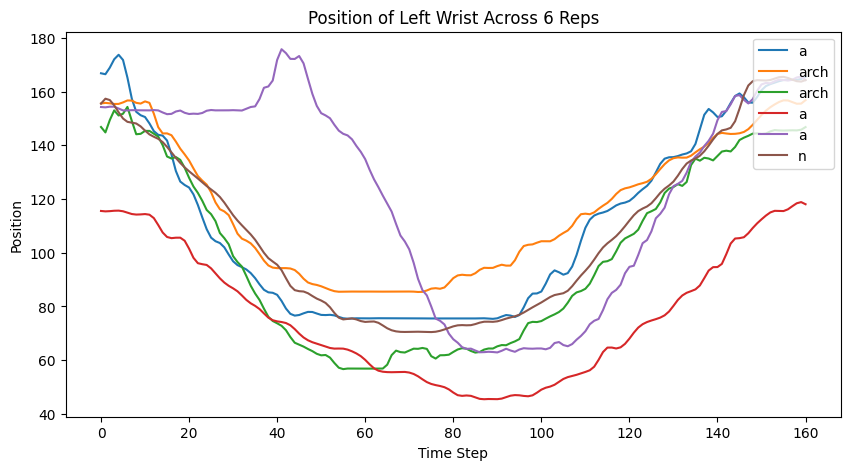

In [23]:
plt.figure(figsize=(10, 5))

plt.title("Position of Left Wrist Across 6 Reps")

plt.plot(train_x.loc[0]['LWrist_Y'], label=train_y[0])
plt.plot(train_x.iloc[1]['LWrist_Y'], label=train_y[1])
plt.plot(train_x.iloc[2]['LWrist_Y'], label=train_y[2])
plt.plot(train_x.iloc[3]['LWrist_Y'], label=train_y[3])
plt.plot(train_x.iloc[4]['LWrist_Y'], label=train_y[4])
plt.plot(train_x.iloc[5]['LWrist_Y'], label=train_y[5])
plt.xlabel("Time Step")
plt.ylabel("Position")

plt.legend(loc='upper right')
plt.savefig('Images/LeftWrist.png')

plt.show()

<br><br>

### Plot of the positition of the left wrist in comparison to the right wrist during a single 'asymmetric' rep

- The left wrist moving up and down can be easily seen, while the right wrist barely moves at all

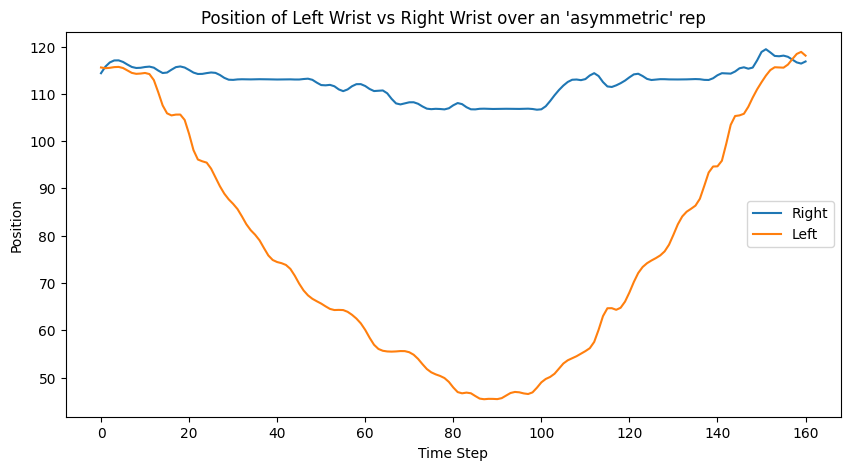

In [32]:
plt.figure(figsize=(10, 5))

plt.title("Position of Left Wrist vs Right Wrist over an 'asymmetric' rep")

plt.plot(train_x.iloc[3]['RWrist_Y'], label='Right')
plt.plot(train_x.iloc[3]['LWrist_Y'], label='Left')
plt.xlabel("Time Step")
plt.ylabel("Position")

plt.legend(loc='center right')
plt.savefig('Images/LeftvRight.png')
plt.show()

<br><br>
- As the reduced range induced form involves the bar not traveling down as far, we'd expect the average distance travelled by the wrists to be less than that of the other forms
- Similarly as the arch induced form involves arching the back, lowering the shoulders slightly towards the floor, the average distance that the wrists travel would be expected to be greater

- The results below show that this is indeed the case

In [33]:
# Group dataframe by label, then pass each grouped dataframe
frame_x = train_x.copy()
frame_x['Label'] = train_y.tolist()
for label, label_df in frame_x.groupby(by=['Label']):
    avg_range = 0
    for i in range(label_df.shape[0]):
        avg_range += label_df.iloc[i]['LWrist_Y'].max() - label_df.iloc[i]['LWrist_Y'].min()
        avg_range += label_df.iloc[i]['RWrist_Y'].max() - label_df.iloc[i]['RWrist_Y'].min()
    print(f"{label}: {avg_range/label_df.shape[0]/2}")


a: 86.73184641176472
arch: 92.73792383142865
n: 87.26577186621623
r: 66.90089524316942


<br><br>

### Run the Rocket classifier on the unaltered datasets

- Gives the below accuracy

Accuracy: 82.85714285714286

In [34]:
acc, preds = rocket.run_classifier(train_x, train_y, test_x, test_y)
print(f"Accuracy: {acc}")

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 2.2min
[Pipeline] ......... (step 2 of 3) Processing normalise, total=   1.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=   3.1s
Accuracy: 82.85714285714286


<br><br>

### Drop columns that don't improve accuracy of the classifier

- Some of the columns do not help the accuracy and in fact reduce it as they weren't properly tracked
- Below shows a time series of a 'Nose_Y' time series, it's values are all zero
- Time could be spent finding the optimal permutation of body parts to use, though this isn't neccessarily important for the purposes of this project

In [37]:
print(train_x.loc[1]['Nose_Y'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
156    0.0
157    0.0
158    0.0
159    0.0
160    0.0
Length: 161, dtype: float64


In [38]:
max(train_x.loc[1]['Nose_Y'])

0.0

- Here I drop the columns that I know are not accurate such as facial features and toes as these body parts are not facing the camera when being tracked and thus wouldn't be helpful
- The classifier is then run again, giving the below accuracy

- As can be seen, there is a noticeable improvement in the accuracy simply from dropping those columns
- This will then be the benchmark against which the augmentation methods will be compared

Accuracy: 85.21008403361344

In [35]:
train_x = train_x.drop(columns=['REye_Y', 'LEye_Y', 'REye_X', 'LEye_X','Nose_X', 'Nose_Y', 'LBigToe_X', 'LBigToe_Y', 'RBigToe_X', 'RBigToe_Y', 'LSmallToe_X', 'LSmallToe_Y', 'RSmallToe_X', 'RSmallToe_Y'])
test_x = test_x.drop(columns=['REye_Y', 'LEye_Y', 'REye_X', 'LEye_X','Nose_X', 'Nose_Y', 'LBigToe_X', 'LBigToe_Y', 'RBigToe_X', 'RBigToe_Y', 'LSmallToe_X', 'LSmallToe_Y', 'RSmallToe_X', 'RSmallToe_Y'])
train_x.shape

(1426, 36)

In [41]:
acc, preds = rocket.run_classifier(train_x, train_y, test_x, test_y)
print(f"Accuracy: {acc}")

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 2.5min
[Pipeline] ......... (step 2 of 3) Processing normalise, total=   2.3s
[Pipeline] ............. (step 3 of 3) Processing model, total=   2.6s
Accuracy: 85.21008403361344
